In [5]:
#Empezamos agarrando mis archivos de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Aquí generé el acceso a la base de datos (CSV), localizamos los datos en mi Drive, los datos fueron descargados de la DB de INEGI
ruta_csv = '/content/drive/My Drive/proyecto_data/conjunto_de_datos_matrimonios_2017_csv/conjunto_de_datos/conjunto_de_datos_matrimonios_2017.csv'

In [7]:
# Implementación de las librerias utilizadas.
from IPython.display import display # Para mostrar múltiples resultados en una sola celda.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

Hacemos un poco de "limpieza a la DB".

*   Se reemplazan los datos NaN por cero.
*   Se eliminan espacios en los encabezados de las columnas por guión bajo.
*   Se eliminan espacios en blanco que no sean necesarios.
*   Estandarizamos todo en minusculas para evitar errores.


In [8]:
#Declaración de las variables generales
df = pd.read_csv(ruta_csv)

# Reemplazamos los NaN con un valor, en este caso se optó por: 0
df.fillna(0, inplace=True)

# Cambiar los encabezados de las columnas
df.columns = df.columns.str.replace(' ', '_')

#Convertir los encabezados de las columnas en mínusculas
df.columns = df.columns.str.lower()

# Eliminar espacios en blanco en todas las columnas de texto
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convertir todo a minúsculas en todas las columnas de texto
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-8-9ed3cebf471a>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-8-9ed3cebf471a>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [9]:
#Se genera un panorama general de los datos. ¿Qué tanto tenemos para trabajar?
def info_general_df(df):
  print('Información general del DataFrame')
  print(f'Cantidad de filas y columnas: {df.shape}')
  print("-"*50)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*50)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print("-"*50)
  print(f'Tipos de datos por columna: \n{df.dtypes}')

info_general_df(df)

Información general del DataFrame
Cantidad de filas y columnas: (528678, 35)
--------------------------------------------------
Cantidad de datos nulos por columna: 
ent_regis     0
mun_regis     0
loc_regis     0
tam_loc_re    0
dia_regis     0
mes_regis     0
anio_regis    0
regimen_ma    0
genero        0
sexo_con1     0
edad_con1     0
naci_con1     0
ocup_con1     0
entrh_con1    0
munrh_con1    0
locrh_con1    0
tlorh_con1    0
escol_con1    0
conactcon1    0
sitlabcon1    0
postracon1    0
sexo_con2     0
edad_con2     0
naci_con2     0
ocup_con2     0
entrh_con2    0
munrh_con2    0
locrh_con2    0
tlorh_con2    0
escol_con2    0
conactcon2    0
sitlabcon2    0
postracon2    0
tipo_con      0
dis_re_oax    0
dtype: int64
--------------------------------------------------
Cantidad de datos únicos por columna: 
ent_regis      32
mun_regis     306
loc_regis     343
tam_loc_re     17
dia_regis      32
mes_regis      12
anio_regis      1
regimen_ma      4
genero          2
sexo_con1

In [10]:
#Desplegamos la DB
display(df)

ent_regis  mun_regis  loc_regis  tam_loc_re  dia_regis  mes_regis  \
0               1          1          1          15          4          1   
1               1          1          1          15          5          1   
2               1          1          1          15          5          1   
3               1          1          1          15          5          1   
4               1          1          1          15          6          1   
...           ...        ...        ...         ...        ...        ...   
528673         32         58          1           2         13         10   
528674         32         58          1           2         17         11   
528675         32         58          1           2         19         11   
528676         32         58          1           2         29         11   
528677         32         58          1           2         30         12   

        anio_regis  regimen_ma  genero  sexo_con1  ...  entrh_con2  \
0             2017           1       1          1  ...           1   
1             2017           1       1          1  ...           1   
2             2017           2       1          1  ...           1   
3             2017           2       1          1  ...           1   
4             2017           2       1          1  ...           1   
...            ...         ...     ...        ...  ...         ...   
528673        2017           1       1          1  ...          32   
528674        2017           2       1          1  ...          14   
528675        2017           1       1          1  ...          32   
528676        2017           1       1          1  ...          32   
528677        2017           1       1          1  ...          32   

        munrh_con2  locrh_con2  tlorh_con2  escol_con2  conactcon2  \
0                1           1          15           6           2   
1                1           1          15           4           2   
2                1           1          15           5           1   
3                1           1          15           7           1   
4                1           1          15           5           2   
...            ...         ...         ...         ...         ...   
528673          45           1           4           4           2   
528674          39           1          16           5           9   
528675          58           1           2           6           1   
528676          58        7777           1           5           9   
528677          56           1          13           8           9   

        sitlabcon2  postracon2  tipo_con  dis_re_oax  
0                2           9         1         999  
1                3           9         1         999  
2                1           2         1         999  
3                1           2         1         999  
4                3           9         1         999  
...            ...         ...       ...         ...  
528673           3           9         1         999  
528674           9           9         1         999  
528675           1           4         1         999  
528676           9           9         1         999  
528677           9           9         1         999  

[528678 rows x 35 columns]

De acuerdo al archivo albergado en la carpeta de **"Conjunto_de_datos_matrimonios_2017_csv\diccionario_de_datos"** y el archivo excel nombra de la misma manera *'diccionario de datos'* corresponde a la cantidad exacta de columnas (35).

# **Se abordan un par de preguntas a resolver, las cuales van de encabezado y enseguida se coloca el código para ir dando solución a las problematicas. **

In [21]:
# Pregunta 1: ¿Cuáles son los valores atípicos en la edad de los contrayentes?
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

outliers_edad1 = detectar_outliers(df, 'edad_con1')
outliers_edad2 = detectar_outliers(df, 'edad_con2')

# Mostrar resumen
print(f"Valores atípicos en la edad del primer contrayente: {len(outliers_edad1)} registros")
print(f"Valores atípicos en la edad del segundo contrayente: {len(outliers_edad2)} registros")

Valores atípicos en la edad del primer contrayente: 33610 registros
Valores atípicos en la edad del segundo contrayente: 28887 registros


In [27]:
print(df['edad_con1'].unique())  # Edades hombres

[21 32 35 39 25 23 43 27 31 33 26 28 41 36 74 22 18 45 19 30 29 24 20 47
 38 48 54 66 51 58 34 42 69 52 59 49 37 46 40 75 50 61 44 55 53 62 56 67
 68 63 60 99 57 79 73 78 65 64 85 86 70 77 72 71 82 76 81 87 80 90 88 83
 84 91 95 96 17 89 98 93 92 16 15 94 97]


In [28]:
print(df['edad_con2'].unique())  # Edades mujeres

[18 35 38 30 20 25 23 32 31 28 22 21 24 27 50 45 19 26 33 42 36 29 34 47
 37 56 99 40 44 49 53 46 60 48 52 54 39 43 57 51 41 59 55 76 88 62 66 67
 64 65 63 61 70 58 72 75 68 69 71 79 74 82 83 81 73 86 17 78 84 85 77 15
 16 80 87 89 14 90 92 94 13 98 96 91 93]


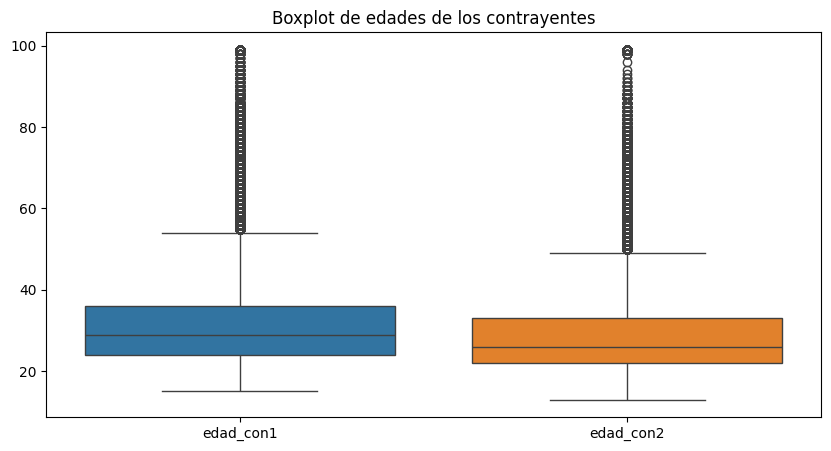

In [12]:
# Visualización con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['edad_con1', 'edad_con2']])
plt.title('Boxplot de edades de los contrayentes')
plt.show()

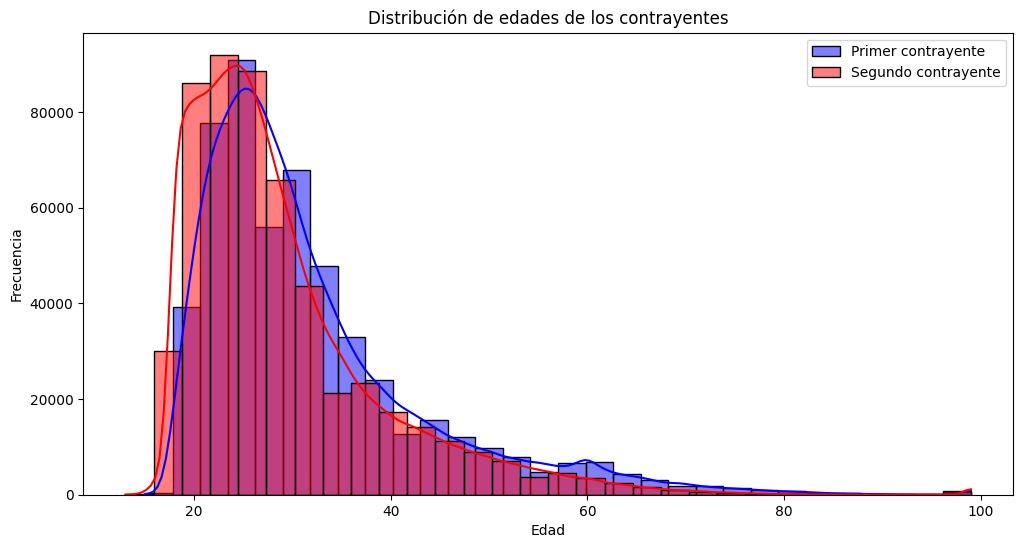

In [13]:
# Pregunta 2: ¿Cómo se distribuyen las edades de los contrayentes?
plt.figure(figsize=(12, 6))
sns.histplot(df['edad_con1'], kde=True, color='blue', label='Primer contrayente', bins=30)
sns.histplot(df['edad_con2'], kde=True, color='red', label='Segundo contrayente', bins=30)
plt.legend()
plt.title('Distribución de edades de los contrayentes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

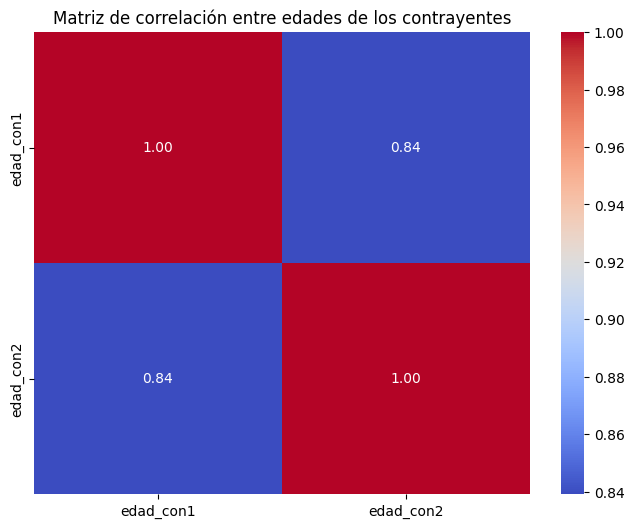

In [14]:
# Pregunta 3: ¿Existe correlación entre la edad de los contrayentes?
correlacion = df[['edad_con1', 'edad_con2']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre edades de los contrayentes')
plt.show()

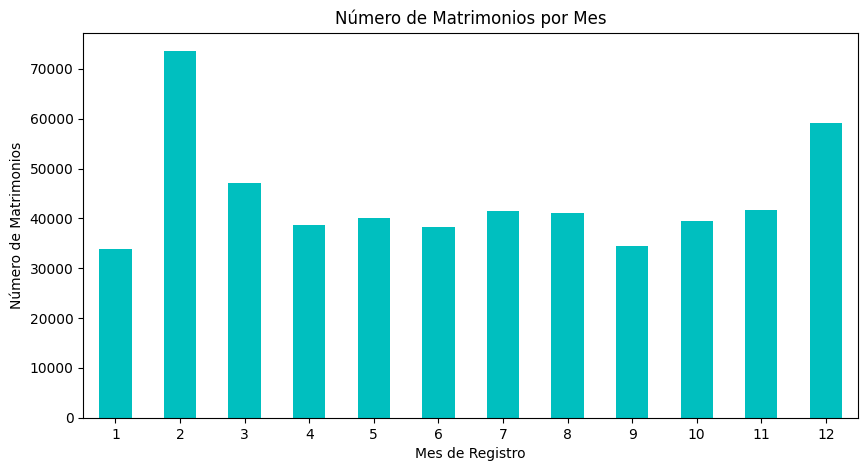

In [16]:
# Pregunta 4: ¿Existen meses con mayor cantidad de matrimonios?

# Contar matrimonios por año
matrimonios_por_anio = df.groupby('anio_regis').size()

# Matrimonios por mes
matrimonios_por_mes = df.groupby('mes_regis').size()

# Graficar matrimonios por mes
plt.figure(figsize=(10,5))
matrimonios_por_mes.plot(kind='bar', color='c')
plt.xlabel('Mes de Registro')
plt.ylabel('Número de Matrimonios')
plt.title('Número de Matrimonios por Mes')
plt.xticks(rotation=0)
plt.show()

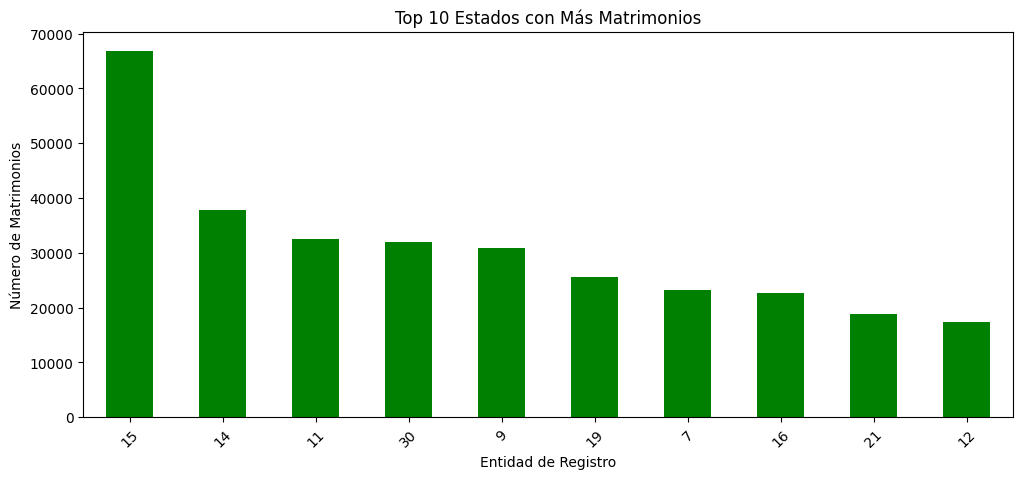

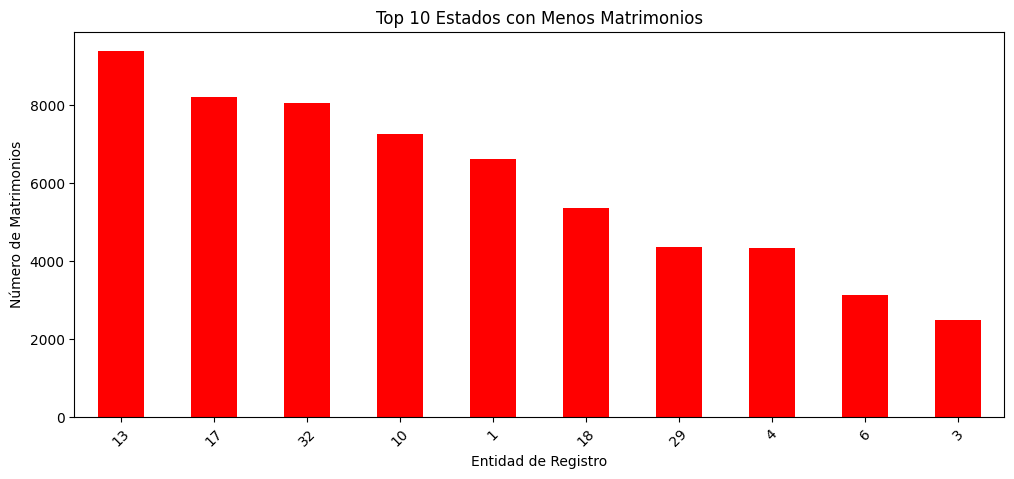

In [18]:
# Pregunta 5: ¿Qué estados tienen las tasas de matrimonio más altas y más bajas?

# Contar matrimonios por estado
matrimonios_por_estado = df['ent_regis'].value_counts()

# Graficar los 10 estados con más y menos matrimonios
plt.figure(figsize=(12,5))
matrimonios_por_estado.head(10).plot(kind='bar', color='green')
plt.xlabel('Entidad de Registro')
plt.ylabel('Número de Matrimonios')
plt.title('Top 10 Estados con Más Matrimonios')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
matrimonios_por_estado.tail(10).plot(kind='bar', color='red')
plt.xlabel('Entidad de Registro')
plt.ylabel('Número de Matrimonios')
plt.title('Top 10 Estados con Menos Matrimonios')
plt.xticks(rotation=45)
plt.show()


In [26]:
print(df['ent_regis'].unique())  # cuantas entidades se manejan dentro de la DB

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


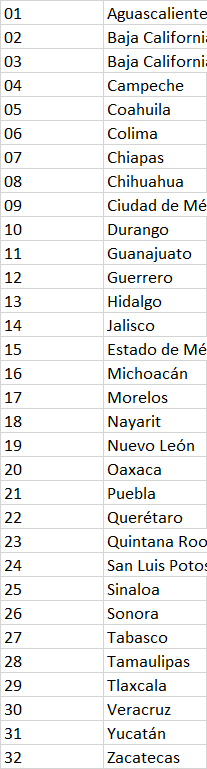